# Install and Load Packages

In [ ]:
!pip install econml

     |████████████████████████████████| 3.3 MB 5.1 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 356 kB 71.5 MB/s 
     |████████████████████████████████| 123 kB 66.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491664 sha256=95c6d7089d50f3742cfc25e8c7ea3559f4bef2a182053e10ddcb340af54d4183
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Dataset

In [ ]:
# learning mindset_dataset
data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")

# Simple Data Inspection and Exploration

In [ ]:
# check data
data

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10386,1,0,0.808867,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10387,1,0,-0.156063,7,4,2,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10388,1,0,0.370820,2,15,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702
10389,1,0,-0.396297,5,4,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702


In [ ]:
# check info data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


Pada pemilihan variabel, hasil success expect menjadi patokan untuk outcome dari penelitian. Sedangkan intervensi menjadi treatment (T) karena kita akan menganalisis user-user dengan Dua grup dibentuk dimana satu grup diberikan seminar tentang growth mindset sedangkan yang lainnya tidak (jika variabel intervention bernilai 0 maka tidak diberi seminar, begitupun sebaliknya). Dan variabel lainnya menjadi kovariat untuk melihat pengaruh dari outcome yang dimiliki.

# Meta-Learner

In [ ]:
# outcome
y = "success_expect"
# treatment
T = "intervention"
# covariates
X = ["school_poverty", "school_mindset", "ethnicity","gender","frst_in_family","school_urbanicity","school_achievement","school_ethnic_minority","school_size"]

## Define S-Learner

In [ ]:
# define gradient boosting regression as S-Learner model
overall_model = GradientBoostingRegressor(n_estimators=100, max_depth=6)
s_learner = SLearner(overall_model = overall_model)
# fit learner to data
s_learner.fit(Y = data[y], T = data[T], X = data[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [ ]:
# Estimate treatment effects on test data
s_te = s_learner.effect(data[X])

In [ ]:
# measure average treatment
np.mean(s_te)

## Define T-Learner

In [ ]:
# define gradient boosting regression as T-Learner model
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
T_learner = TLearner(models=models)
# fit learner to data
T_learner.fit(Y = data[y], T = data[T], X = data[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [ ]:
# Estimate treatment effects on test data
T_te = T_learner.effect(data[X])

In [ ]:
# measure average treatment
np.mean(T_te)

## Define X-Learner

In [ ]:
# Define X-learner
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Fit learner to data
X_learner.fit(Y = data[y], T = data[T], X = data[X])

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [ ]:
# Estimate treatment effects on test data
X_te = X_learner.effect(data[X])

In [ ]:
# measure average treatment
np.mean(X_te)

## Model Evaluation

In [ ]:
S_learner_df = pd.DataFrame({"model":"S-learner", "treatment_effect": s_te})
T_learner_df = pd.DataFrame({"model":"T-learner", "treatment_effect": T_te})
X_learner_df = pd.DataFrame({"model":"X-learner", "treatment_effect": X_te})

In [ ]:
all_treatment_effect = pd.concat([S_learner_df, T_learner_df, X_learner_df])

In [ ]:
all_treatment_effect

,model,treatment_effect
0,S-learner,0.123177
1,S-learner,0.157219
2,S-learner,-0.011637
3,S-learner,-0.011637
4,S-learner,0.006967
...,...,...
10386,X-learner,0.342347
10387,X-learner,0.342347
10388,X-learner,0.667324
10389,X-learner,0.005825


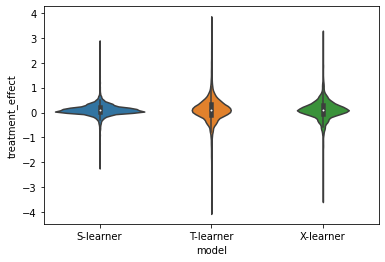

In [ ]:
sns.violinplot(x = "model", y = "treatment_effect", data = all_treatment_effect);

Pada case ini, kami memilih model Meta-Learner untuk menganalisis dampak dari treatment dengan menghitung per user dengan lebih detail. Dari hasil plot model evaluasi, terlihat bahwa S-learner memiliki distribusi data yang lebih rapat dibanding T-learner dan X-learner karena model ini bisa menghandle imbalance yang lebih baik dibanding kedua model tersebut.